In [30]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

deliveryTime=pd.read_csv('F:/Sampada/Sampada/Assignments/Simple Linear Regression/delivery_time.csv')
deliveryTime.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
deliveryTime.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [5]:
deliveryTime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\sonali jante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

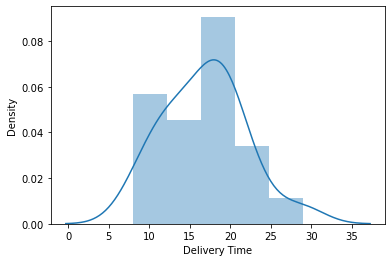

In [6]:
sns.distplot(deliveryTime['Delivery Time'])

C:\Users\sonali jante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

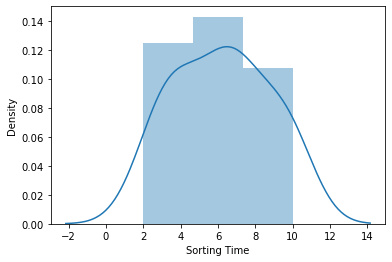

In [7]:
sns.distplot(deliveryTime['Sorting Time'])

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

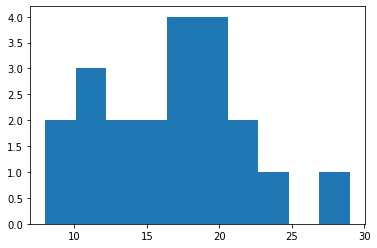

In [2]:
plt.hist(deliveryTime['Delivery Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x184703eba90>,
 'caps': [<matplotlib.lines.Line2D at 0x184703fe130>,
 'boxes': [<matplotlib.lines.Line2D at 0x184703eb7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x184703fe610>],
 'fliers': [<matplotlib.lines.Line2D at 0x184703fe8e0>],
 'means': []}

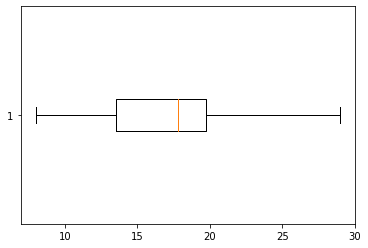

In [3]:
plt.boxplot(deliveryTime['Delivery Time'],0,"rs",0)

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

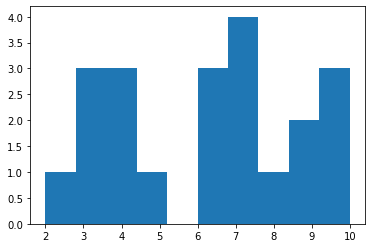

In [5]:
plt.hist(deliveryTime['Sorting Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x184704e3be0>,
 'caps': [<matplotlib.lines.Line2D at 0x184704f21c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x184704e3910>],
 'medians': [<matplotlib.lines.Line2D at 0x184704f2760>],
 'fliers': [<matplotlib.lines.Line2D at 0x184704f2a30>],
 'means': []}

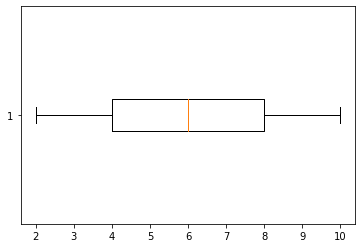

In [6]:
plt.boxplot(deliveryTime['Sorting Time'],0,"rs",0)

Text(0, 0.5, 'Sorting')

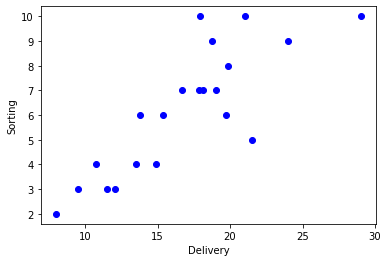

In [7]:
plt.plot(deliveryTime['Delivery Time'],deliveryTime['Sorting Time'],"bo");plt.xlabel("Delivery");plt.ylabel("Sorting")

In [9]:
dt_colrename=deliveryTime.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dt_colrename.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [10]:
dt_colrename.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

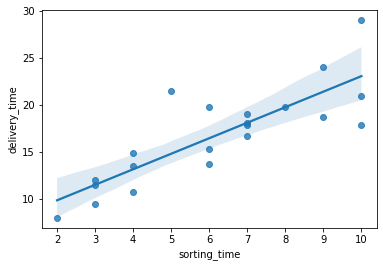

In [11]:
sns.regplot(x=dt_colrename['sorting_time'],y=dt_colrename['delivery_time'])

In [22]:
model=smf.ols("sorting_time~delivery_time",data=dt_colrename).fit()

In [23]:
model.params

Intercept       -0.756673
delivery_time    0.413744
dtype: float64

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           3.98e-06
Time:                        11:45:51   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
delivery_time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model.conf_int(0.05)

,0,1
Intercept,-3.130058,1.616712
delivery_time,0.278169,0.549318


In [26]:
pred = model.predict(dt_colrename.iloc[:,0])

Text(0, 0.5, 'Sorting')

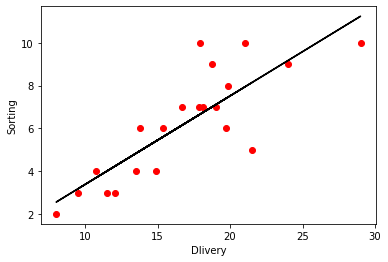

In [27]:
plt.scatter(x=dt_colrename['delivery_time'],y=dt_colrename['sorting_time'],color='red');
plt.plot(dt_colrename['delivery_time'],pred,color='black');
plt.xlabel('Dlivery');
plt.ylabel('Sorting')

In [28]:
pred.corr(dt_colrename.sorting_time)

0.8259972607955326

In [32]:
# Transforming variables for accuracy
model2 = smf.ols('sorting_time~np.log(delivery_time)',data=dt_colrename).fit()
model2.params

Intercept               -12.499233
np.log(delivery_time)     6.735548
dtype: float64

In [33]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           1.59e-06
Time:                        12:01:51   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(delivery_time)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
print(model2.conf_int(0.01))

                               0         1
Intercept             -20.369797 -4.628668
np.log(delivery_time)   3.916690  9.554407


In [36]:
pred2 = model2.predict(pd.DataFrame(dt_colrename['delivery_time']))
pred2.corr(dt_colrename.sorting_time)

0.8431772637224146

Text(0, 0.5, 'Sorting')

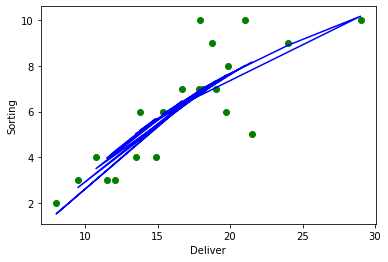

In [37]:
plt.scatter(x=dt_colrename['delivery_time'],y=dt_colrename['sorting_time'],color='green');
plt.plot(dt_colrename['delivery_time'],pred2,color='blue');
plt.xlabel('Deliver');plt.ylabel('Sorting')

In [38]:
model3 = smf.ols('np.log(sorting_time)~delivery_time',data=dt_colrename).fit()
model3.params

Intercept        0.437237
delivery_time    0.076901
dtype: float64

In [39]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(sorting_time)   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                     43.39
Date:                  Sat, 13 Aug 2022   Prob (F-statistic):           2.64e-06
Time:                          14:31:50   Log-Likelihood:               -0.85600
No. Observations:                    21   AIC:                             5.712
Df Residuals:                        19   BIC:                             7.801
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4372      0.204      2.139      0.046       0.009       0.865
delivery_time     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
print(model3.conf_int(0.01))

                      0         1
Intercept     -0.147491  1.021964
delivery_time  0.043499  0.110302


In [41]:
pred_log = model3.predict(pd.DataFrame(dt_colrename['delivery_time']))
pred_log

0     2.052148
1     1.475394
2     1.956022
3     2.282850
4     2.667352
5     1.617660
6     1.898347
7     1.167792
8     1.813756
9     1.879122
10    1.962174
11    1.263917
12    1.719938
13    1.321593
14    1.362350
15    1.581517
16    1.494619
17    1.829905
18    1.052441
19    1.808373
20    2.090598
dtype: float64

In [42]:
pred3=np.exp(pred_log)
pred3

0      7.784605
1      4.372758
2      7.071145
3      9.804581
4     14.401789
5      5.041280
6      6.674852
7      3.214886
8      6.133444
9      6.547752
10     7.114781
11     3.539259
12     5.584181
13     3.749389
14     3.905361
15     4.862325
16     4.457638
17     6.233298
18     2.864635
19     6.100516
20     8.089754
dtype: float64

In [43]:
pred3.corr(dt_colrename.sorting_time)

0.7472768828616799

In [44]:
# so we will consider the model having highest R-Squared value which is the log transformation - model2

In [45]:
resid = model2.resid_pearson 
resid

array([ 1.42113829, -0.73549981, -1.13675271,  0.06653685, -0.1293345 ,
        0.07393595, -0.23761321,  0.23930282,  2.18837683,  1.25235279,
        0.27017028,  0.35868204,  0.38795221, -0.67844924, -0.89488241,
       -1.2030258 ,  0.60269965, -0.00716213,  0.35163128,  0.06768673,
       -2.25774594])

Text(0, 0.5, 'Standardized Residual')

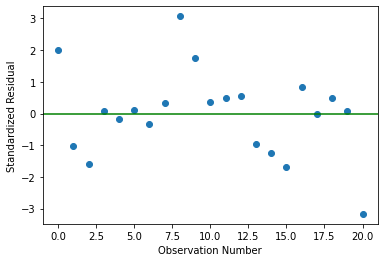

In [46]:
plt.plot(model2.resid,'o');
plt.axhline(y=0,color='green');
plt.xlabel("Observation Number");
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

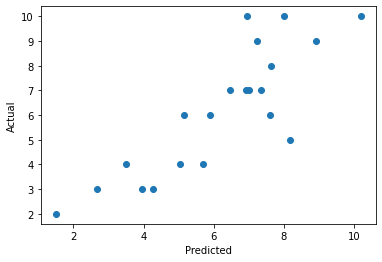

In [47]:
plt.scatter(x=pred2,y=dt_colrename.sorting_time);
plt.xlabel("Predicted");
plt.ylabel("Actual")

In [51]:
dt_colrename["deliveryTime_Sq"] = dt_colrename.delivery_time*dt_colrename.delivery_time
model_quad = smf.ols("sorting_time~delivery_time+deliveryTime_Sq",data=dt_colrename).fit()
model_quad.params

Intercept         -4.640096
delivery_time      0.894094
deliveryTime_Sq   -0.013646
dtype: float64

In [54]:
dt_colrename

,delivery_time,sorting_time,deliveryTime_Sq
0,21.00,10,441.0000
1,13.50,4,182.2500
2,19.75,6,390.0625
3,24.00,9,576.0000
4,29.00,10,841.0000
5,15.35,6,235.6225
6,19.00,7,361.0000
7,9.50,3,90.2500
8,17.90,10,320.4100
9,18.75,9,351.5625


In [52]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     22.72
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           1.19e-05
Time:                        14:51:43   Log-Likelihood:                -35.650
No. Observations:                  21   AIC:                             77.30
Df Residuals:                      18   BIC:                             80.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.6401      2.864     -1.620      0.123     -10.657       1.377
delivery_time       0.8941      0.333      2.685      0.015       0.194       1.594
deliveryTime_Sq    -0.0136      0.009     -1.469      0.159      -0.033       0.006
==============================================================================
Omnibus:                        1.829   Durbin-Watson:                   1.210
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                0.513
Skew:                          -0.156   Prob(JB):                        0.774
Kurtosis:                       3.699   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
model_quad.conf_int(0.05)

,0,1
Intercept,-10.657470,1.377279
delivery_time,0.194383,1.593804
deliveryTime_Sq,-0.033167,0.005874


Text(0, 0.5, 'Standardized Residual')

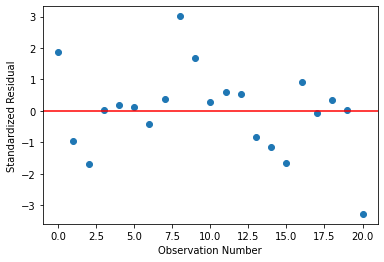

In [61]:
plt.scatter(np.arange(21),model_quad.resid);
plt.axhline(y=0,color='red');
plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

(array([1., 0., 2., 3., 1., 8., 3., 1., 1., 1.]),
 array([-3.27490198, -2.64658788, -2.01827378, -1.38995968, -0.76164558,
        -0.13333148,  0.49498262,  1.12329672,  1.75161081,  2.37992491,
         3.00823901]),
 <BarContainer object of 10 artists>)

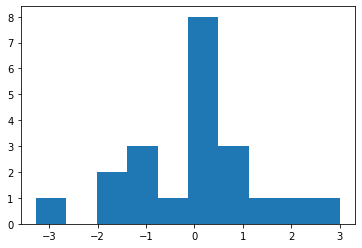

In [62]:
plt.hist(model_quad.resid)